In [27]:
import numpy as np                      # Arrays
import pandas as pd                     # DataFrame(Structured Table)
import matplotlib.pyplot as plt         # Plotting
import seaborn as sns                   # Plotting
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

Data Collection and Processing

In [28]:
# loading the csv data to a Pandas DataFrame
gold_data = pd.read_csv("gld_price_data.csv")

In [29]:
# Print first 5 rows
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [30]:
# print last 5 rows
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [31]:
# no of rows and columns
gold_data.shape

(2290, 6)

In [32]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [33]:
# checking the number of missing values
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [34]:
# getting the statistical measures of the data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


Correlation:
1. Positive Correlation
2. Negative Correlation

In [35]:
correlation = gold_data.corr()

<AxesSubplot:>

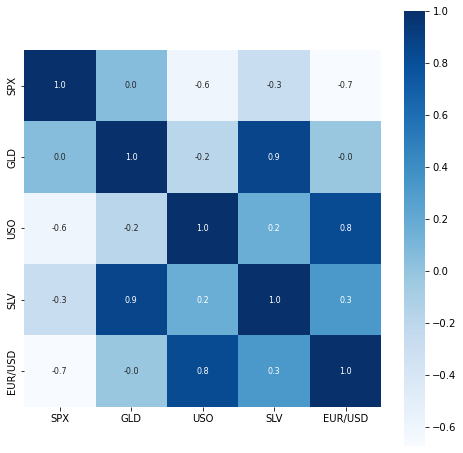

In [36]:
# Constructing a heatmap to understand the correlation
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar = True, square = True, fmt = ".1f", annot = True, annot_kws = {"size":8}, cmap = "Blues" )

In [37]:
# correlation values of GLD
print(correlation["GLD"])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='GLD', ylabel='Density'>

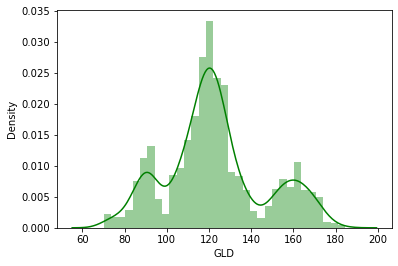

In [38]:
# distribution of the GLD Price
sns.distplot(gold_data["GLD"], color = "green" )

Splitting the Features and Target

In [39]:
x = gold_data.drop(["Date","GLD"],axis = 1)       #axis=1(drop column),axis=0(drop row)
y = gold_data["GLD"]

In [40]:
print(x)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [41]:
print(y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


Splitting into Training Data and Test Data

In [42]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 2)

Model Training - 
Random Forest Regressor

In [43]:
regressor = RandomForestRegressor(n_estimators = 100)

In [44]:
# Training the model
regressor.fit(x_train, y_train)

RandomForestRegressor()

Model Evaluation

In [45]:
# prediction on Test Data
test_data_prediction = regressor.predict(x_test)

In [46]:
print(test_data_prediction)

[168.76059993  82.0640997  116.17310021 127.71080072 120.70340154
 154.9858972  150.45699945 126.18090013 117.47579889 126.11980072
 116.84540068 172.05500074 141.78259831 167.92269835 115.16589966
 117.77480027 139.50970277 169.99640055 160.03810227 161.8414008
 155.14720012 125.00750013 175.93179956 157.17020401 125.23410021
  93.61259983  77.65640012 120.60040001 119.07279942 167.44780012
  88.17840059 125.32960006  90.86210078 117.70400026 121.18229924
 136.47940086 115.55170111 115.6731008  147.99279967 107.31470107
 104.39070249  87.15679765 126.54120072 118.09900008 154.48129883
 119.55889994 108.57650013 108.21699802  93.18900036 127.08219801
  75.53419994 113.60919892 121.41049977 111.40419902 118.88419903
 120.50819929 158.81030038 165.60640165 146.9779968   85.7666984
  94.30090023  86.89129911  90.50050048 119.08220081 126.44140077
 127.47589968 169.65939958 122.28179949 117.50089887  98.48450054
 167.4908014  143.5639989  131.47840264 121.1331022  121.34519925
 119.7204005

In [48]:
# R squared Error
error_score = metrics.r2_score(y_test, test_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.9894673145495491


Compare the actual value and Predicted value in a plot

In [49]:
y_test = list(y_test)

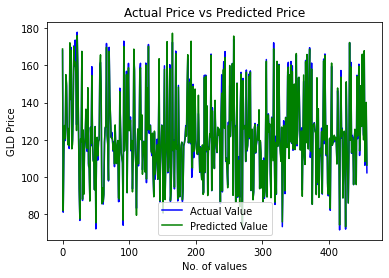

In [50]:
plt.plot(y_test, color = "blue", label = "Actual Value")
plt.plot(test_data_prediction, color = "green", label = "Predicted Value")
plt.title("Actual Price vs Predicted Price")
plt.xlabel("No. of values")
plt.ylabel("GLD Price")
plt.legend()
plt.show()